<a href="https://colab.research.google.com/github/SusannYY/ADIHP-HealthcareFraud/blob/main/ADIHP_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Anomaly Detection in Healthcare Providers

#Imported Packages and Functions

In [ ]:
import numpy as np
import shapely
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [ ]:
#RMSE 
def root_mean_squared_error(predicted, actual):
  return np.mean((actual - predicted) ** 2) ** 0.5

In [ ]:
#MAE
def mean_absolute_error(predicted, actual):
  return np.mean(abs(predicted - actual))

# Expected Steps:
Step 1: using visualization to find outliers (Folium Mapping may be used to visualize the outliers scattering map) \
Step 2: using regression models to find 'what variables are associated with whether or not payment for a medical service is an outlier'

## Data Cleaning

In [ ]:
df = pd.read_csv("/content/Healthcare Providers (1).csv")
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,F,I,324 E BALTIMORE ST,NaN,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,NaN,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [ ]:
dele_coma = lambda x: float(x.split()[0].replace(',', ''))

In [ ]:
dele_dot = lambda x: str(x).replace('.', '')

In [ ]:
df["Number of Medicare Beneficiaries"] = df["Number of Medicare Beneficiaries"].apply(dele_coma).astype('int')
df["Average Submitted Charge Amount"] = df["Average Submitted Charge Amount"].apply(dele_coma).astype('int')
df["Average Medicare Payment Amount"] = df["Average Medicare Payment Amount"].apply(dele_coma).astype('int')
df["Number of Services"] = df["Number of Services"].apply(dele_coma).astype('int')

In [ ]:
df["Credentials of the Provider"] = df["Credentials of the Provider"].apply(dele_dot)

# Number of Medicare Beneficiaries & Average Submitted Charge Amount

In [ ]:
top_50 = df.head(50)
x_50 = df["Number of Medicare Beneficiaries"].head(50)
y_50 = df["Average Submitted Charge Amount"].head(50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


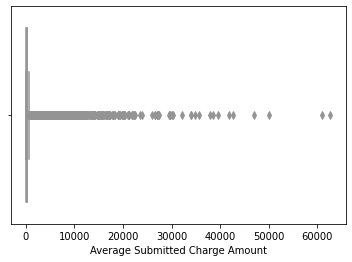

In [ ]:
sns.boxplot(df["Average Submitted Charge Amount"],data = df,palette="PRGn")
plt.show()

The above graph is the visualization of all the average submitted charge amount.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


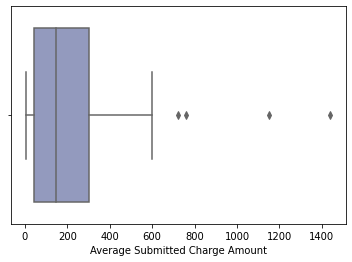

In [ ]:
sns.boxplot(y_50,data = top_50,palette="BuPu")
plt.show()

This is when we randomly selected 50 producers' charge amount data. The box was much clearer.

## Average Submitted Charge Amount in different state

In [ ]:
State_mean = df.groupby("State Code of the Provider").mean()
State_mean.head(5)

,index,National Provider Identifier,Zip Code of the Provider,Number of Services,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Payment Amount
State Code of the Provider,,,,,,,
AA,9.102959e+06,1.922088e+09,7.350390e+08,220.000000,220.000000,99.000000,28.000000
AE,5.651398e+06,1.573333e+09,9.292256e+07,35.000000,34.500000,288.000000,86.500000
AK,5.352203e+06,1.543042e+09,8.088237e+08,65.981818,41.242424,562.727273,85.175758
AL,4.826140e+06,1.490206e+09,3.144200e+08,289.976936,83.328391,286.193850,68.974739
AP,6.754616e+06,1.683454e+09,6.425136e+08,74.666667,72.333333,264.000000,52.666667


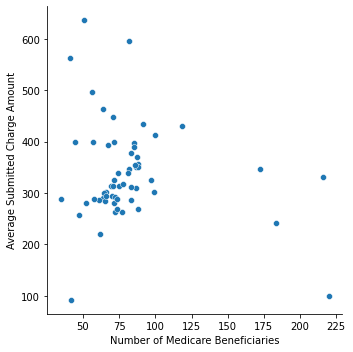

In [ ]:
sns.relplot(x="Number of Medicare Beneficiaries", y="Average Submitted Charge Amount", sizes=(100, 200), data = State_mean, palette = "PuBu_r");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


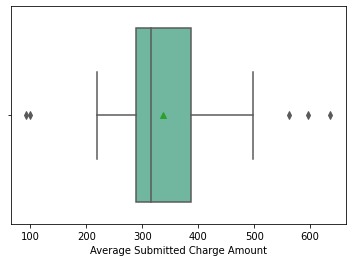

In [ ]:
sns.boxplot(State_mean["Average Submitted Charge Amount"],data = State_mean,palette="BuGn", showmeans = True)
plt.show()

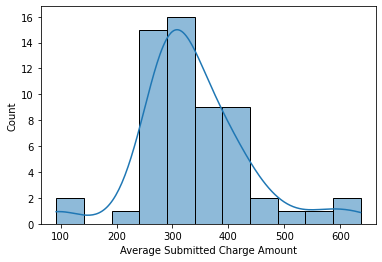

In [ ]:
sns.histplot(data=State_mean, x="Average Submitted Charge Amount", kde=True)

## Linear Regression - Charge Amount

In [ ]:
sample_model = LinearRegression()

In [ ]:
type(State_mean[['Number of Medicare Beneficiaries']])

pandas.core.frame.DataFrame

In [ ]:
type(State_mean['Average Submitted Charge Amount'])

pandas.core.series.Series

In [ ]:
sample_model.fit(X = State_mean[['Number of Medicare Beneficiaries']], y = State_mean['Average Submitted Charge Amount'])

LinearRegression()

run sample_model.coef_ and sample_model.intercept_ to get the appropriate values that define our regression line

In [ ]:
sample_model.coef_

array([-0.52910458])

In [ ]:
sample_model.intercept_

380.8266994865568

In [ ]:
train, test = train_test_split(State_mean, test_size=0.2, random_state=83)

In [ ]:
X_train = train.loc[:, ["Number of Medicare Beneficiaries"]]
y_train = train["Average Submitted Charge Amount"]
X_test = test.loc[:, ["Number of Medicare Beneficiaries"]]
y_test = test["Average Submitted Charge Amount"]

In [ ]:
display(X_train, y_train, X_test, y_test)

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Text(0.5, 1.0, 'regression line of Charge Amount based on Number of Beneficiaries')

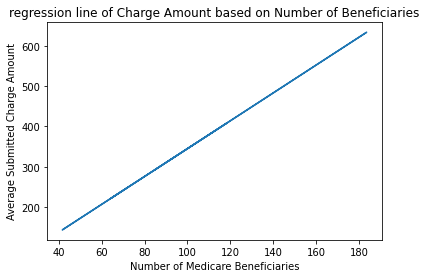

In [ ]:
plt.plot(X_test,y_pred_test)
plt.xlabel("Number of Medicare Beneficiaries")
plt.ylabel("Average Submitted Charge Amount")
plt.title("regression line of Charge Amount based on Number of Beneficiaries")

Text(0.5, 1.0, 'regression line of Charge Amount based on Number of Beneficiaries')

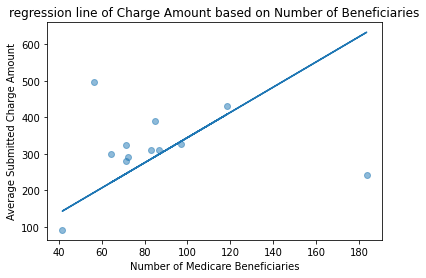

In [ ]:
plt.scatter(X_test,y_test, alpha=0.5)
plt.plot(X_test,y_pred_test)
plt.xlabel("Number of Medicare Beneficiaries")
plt.ylabel("Average Submitted Charge Amount")
plt.title("regression line of Charge Amount based on Number of Beneficiaries")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


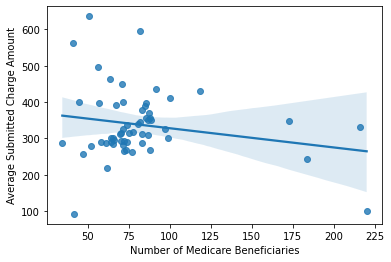

In [ ]:
sns.regplot(State_mean["Number of Medicare Beneficiaries"], State_mean["Average Submitted Charge Amount"])
#create scatterplot with regression line and confidence interval lines

The above graph is a scatterplot with regression line and confidence interval lines

## Linear Regression - Payment Amount

In [ ]:
sample_model = LinearRegression()
sample_model.fit(X = State_mean[['Number of Medicare Beneficiaries']], 
                 y = State_mean['Average Medicare Payment Amount'])
sample_model.coef_
sample_model.intercept_
train, test = train_test_split(State_mean, test_size=0.2, random_state=83)
X_train = train.loc[:, ["Number of Medicare Beneficiaries"]]
y_train = train["Average Medicare Payment Amount"]
X_test = test.loc[:, ["Number of Medicare Beneficiaries"]]
y_test = test["Average Medicare Payment Amount"]
display(X_train, y_train, X_test, y_test)
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
payment_RMSE = root_mean_squared_error(y_pred_test, y_test)
payment_MAE = mean_absolute_error(y_pred_test, y_test)

Text(0.5, 1.0, 'regression line of Payment Amount based on Number of Beneficiaries')

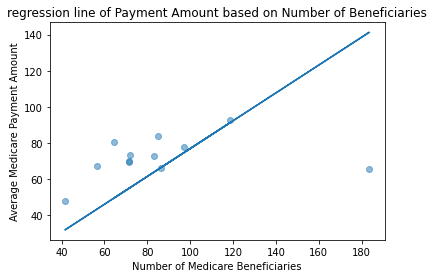

In [ ]:
plt.scatter(X_test,y_test, alpha=0.5)
plt.plot(X_test,y_pred_test)
plt.xlabel("Number of Medicare Beneficiaries")
plt.ylabel("Average Medicare Payment Amount")
plt.title("regression line of Payment Amount based on Number of Beneficiaries")

This is the graph that combines regression model and scatterplot. The x-value is the number of medicare beneficiaries and y-value is the average medicare payment amount of the medical service producers.\
The RMSE of this regression prediction is 26.995905543053972 and MAE is 18.927994027986994. We can see that the regression line fits with the data mostly.\
There is a pretty obvious outlier value at the right of this graph, with about 180 at the number of medicare beneficiaries while 60 as the payment amount,which is way much lower than predicted value based on the regression relationship.

#Linear Regression - Payment Amount & Number of Services

In [ ]:
sample_model = LinearRegression()
sample_model.fit(X = State_mean[['Number of Services']], y = State_mean['Average Submitted Charge Amount'])
sample_model.coef_
sample_model.intercept_
train, test = train_test_split(State_mean, test_size=0.2, random_state=83)
X_train = train.loc[:, ["Number of Services"]]
y_train = train["Average Submitted Charge Amount"]
X_test = test.loc[:, ["Number of Services"]]
y_test = test["Average Submitted Charge Amount"]
display(X_train, y_train, X_test, y_test)
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Text(0.5, 1.0, 'regression line of Charge Amount based on Number of Services')

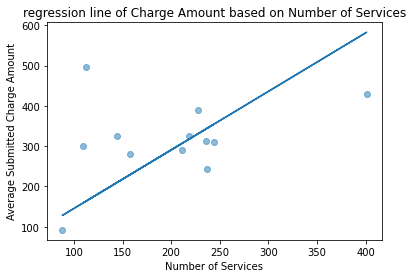

In [ ]:
plt.scatter(X_test,y_test, alpha=0.5)
plt.plot(X_test,y_pred_test)
plt.xlabel("Number of Services")
plt.ylabel("Average Submitted Charge Amount")
plt.title("regression line of Charge Amount based on Number of Services")

Through comparing Linear Regression - Payment Amount & Number of Services and Linear Regression - Payment Amount & Number of Beneficiaries, it seems like Number of Beneficiaries can be a better indicator of outliers.

# Average Submitted Charge Amount in California

In [ ]:
CA = df.where(df["State Code of the Provider"] == 'CA').
      sort_values(by=['State Code of the Provider'])
CA.dropna()
CA.head(5)

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
7,6169160.0,1.629161e+09,GALBREATH,RONALD,G,MD,M,I,12522 E. LAMBERT ROAD,SUITE D,...,G0008,Administration of influenza virus vaccine,N,52,50.0,52,29.33,50.0,28.74,25.32
66801,8670061.0,1.881036e+09,KRISTJANSSON,JENNIFER,NaN,MD,F,I,2315 STOCKTON BLVD,DEPARTMENT OF EMERGENCY MEDICINE,...,99285,"Emergency department visit, problem with signi...",N,100,100.0,100,176.38,988.0,127.3587,126.9606
66785,7919731.0,1.801824e+09,MENG,MAXWELL,V,MD,M,I,1600 DIVISADERO ST FL 3,NaN,...,52000,Diagnostic examination of the bladder and blad...,N,181,104.0,181,122.21,1267.0,85.301270718,73.306187845
66778,1115072.0,1.114233e+09,DAYAL,RAKHI,NaN,MD,F,I,1520 SAN PABLO ST,SUITE 3451,...,99232,"Subsequent hospital inpatient care, typically ...",N,73,36.0,73,78.57,302.0,61.6,57.4
66707,5389173.0,1.548384e+09,BEAHM,BRENT,W,MD,M,I,1400 E CHURCH ST,NaN,...,73060,"X-ray of upper arm, minimum of 2 views",N,14,13.0,13,8.6578571429,25.0,5.3328571429,5.31


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


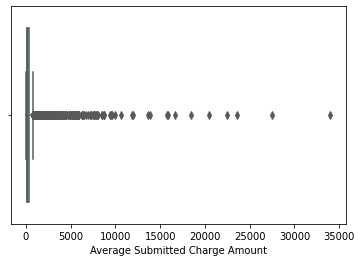

In [ ]:
sns.boxplot(CA["Average Submitted Charge Amount"],data = CA,palette="BuGn")
plt.show()

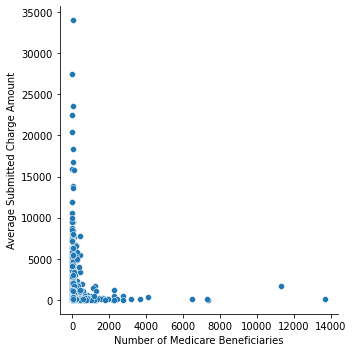

In [ ]:
sns.relplot(x="Number of Medicare Beneficiaries", y="Average Submitted Charge Amount", sizes=(15, 200), data=CA);

In [ ]:
CA_50 = CA.head(50)
CA_x_50 = CA["Number of Medicare Beneficiaries"].head(50)
CA_y_50 = CA["Average Submitted Charge Amount"].head(50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


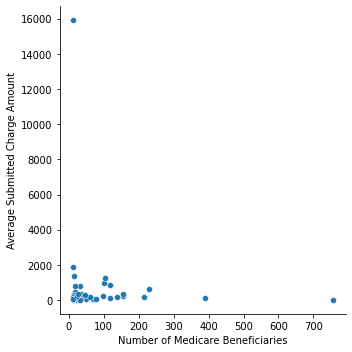

In [ ]:
sns.relplot(CA_x_50, CA_y_50, sizes=(15, 200), data=CA_50);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


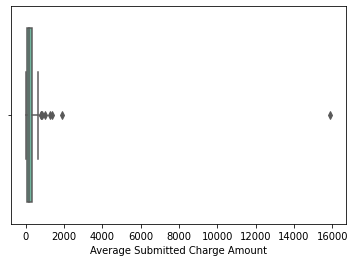

In [ ]:
sns.boxplot(CA_y_50,data = CA_50,palette="BuGn")
plt.show()

# DO vs MD & Average Submitted Charge Amount
Medical students in DO programs must complete 200 hours of training in osteopathic manipulative treatment (OMT; physically manipulating body tissue to treat patients) beyond the typical medical curriculum. MD students do not receive OMT training during medical school.

Whereas MD students have to pass the United States Medical Licensing Exam (USMLE) to obtain licensure, DO students must pass the Comprehensive Medical Licensing Examination (COMLEX) to obtain their medical license.

MD physicians tend to specialize (e.g., cardiology, neurology, ophthalmology) and work in urban areas. DO physicians tend to practice as primary care physicians and work in rural areas (more on this later).

As of November 2021, there are 155 accredited MD programs but only 37 accredited DO programs in the United States.

There is a roughly 9:1 ratio of MD vs. DO physicians in the United States.

DO programs are more likely than MD programs to accept medical students from nontraditional backgrounds, including applicants who are older and pursuing medicine as a second career.

In [ ]:
creden_mean = df.groupby("Credentials of the Provider").mean()
creden_mean

,index,National Provider Identifier,Zip Code of the Provider,Number of Medicare Beneficiaries,Average Submitted Charge Amount
Credentials of the Provider,,,,,
A-NP,7.309938e+06,1.740246e+09,2.260100e+04,196.000000,102.000000
A/ACNP-BC,6.703678e+06,1.679949e+09,7.802825e+08,200.000000,198.000000
A/GNP-C,9.464136e+06,1.962416e+09,7.749473e+08,11.000000,165.000000
AA,4.974529e+06,1.503114e+09,4.607431e+08,22.166667,1523.666667
AA-C,4.474781e+06,1.453239e+09,4.023215e+08,29.000000,801.285714
...,...,...,...,...,...
"WHNP, ANP",2.467578e+06,1.255312e+09,9.450649e+08,64.000000,150.000000
"WHNP, FNP, BC",2.458090e+05,1.023099e+09,3.856347e+08,12.000000,5.000000
WHNP- BC,6.015274e+06,1.619017e+09,1.470166e+08,39.000000,45.000000


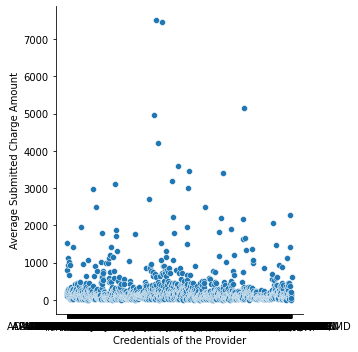

In [ ]:
sns.relplot(x="Credentials of the Provider", y="Average Submitted Charge Amount", sizes=(100, 200), data = creden_mean, palette = "PuBu_r");

In [ ]:
creden_MD = df.where(df["Credentials of the Provider"] == "MD").dropna()
creden_MD.head(5)

In [ ]:
creden_DO = df.where(df["Credentials of the Provider"] == "DO").dropna()
creden_DO.head(5)

In [ ]:
creden = pd.concat([creden_MD, creden_DO])
creden.head(5)

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
7,6169160.0,1.629161e+09,GALBREATH,RONALD,G,MD,M,I,12522 E. LAMBERT ROAD,SUITE D,...,G0008,Administration of influenza virus vaccine,N,52,50.0,52,29.33,50.0,28.74,25.32
17,7008969.0,1.710088e+09,CAMPBELL,AARON,W,MD,M,I,605 MEDICAL COURTS,SUITE 203,...,99212,Established patient office or other outpatient...,N,21,14.0,21,42.06,87.0,26.698095238,28.406190476
33,8238504.0,1.831289e+09,HEIFETZ,SUSAN,D,MD,F,I,2067 W VISTA WAY,SUITE 200,...,G0008,Administration of influenza virus vaccine,N,112,109.0,112,27.390625,28.0,26.601071429,25.107410714
47,8439720.0,1.851504e+09,EICHTEN,JEFFREY,E,MD,M,I,707 ASH STREET,DULUTH CLINIC-SPOONER,...,99316,"Nursing facility discharge management, more th...",N,11,11.0,11,103.26,351.0,80.96,84.13
57,4591932.0,1.467548e+09,LANDIS II,JOHN,N,MD,M,I,3300 MAIN ST,2ND FLOOR SUITE A,...,94375,Diagnostic testing in a pulmonary function lab,N,20,20.0,20,15.47,31.0,12.13,11.82


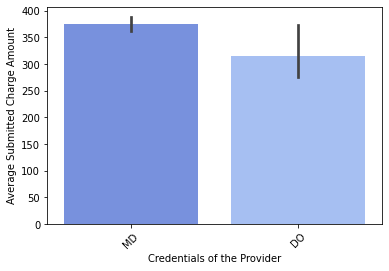

In [ ]:
sns.barplot(x=creden['Credentials of the Provider'],y=creden['Average Submitted Charge Amount'], palette = sns.color_palette('coolwarm'))
plt.xticks(rotation=45)
plt.show()

Providers with MD credential tend to set higher average submitterd charge amount in healthcare products than those with DO credential.

In [ ]:
#plt.figure(figsize=(10,10)) #size of the graph